In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
#from scipy.signal import unit_impulse
#from findiff import FinDiff
#from sympy import symbols, solve

I = 1j

In [2]:
pi = np.pi

Defining some helpful functions first:

In [3]:
def forward_difference(y , dx): #function for numerical differentiation using the forward difference formula
    if len(y) == 1:
        return 0
    dydx = np.array(len(y)*[0.00])
    for i in range(len(y)-1):
        dydx[i] = (y[i+1] - y[i])/(dx)
    
    dydx[-1] = (y[-1] - y[-2])/(dx)
    
    return dydx
        
        

In [4]:
def disc_pieces(x , y): #function to take a discontinuous piecewise function and return each of its pieces along with the size of each discontinuous jump 
    dy = np.array(len(y)*[0.00])
    num_discs = 0 #number of jumps
    size_jump = np.array([])  #size of the jump
    index_jump = np.array([] , dtype = int) #index AFTER which jump occurs
    
    for i in range(len(y)-1):
        dy[i] = (y[i+1] - y[i])
        
        if abs(dy[i]) >= np.pi:   #definining minimum size of a jump as pi
            #print("jump spotted")
            num_discs = num_discs + 1
            size_jump = np.append(size_jump , dy[i])
            #print(size_jump)
            index_jump = np.append(index_jump , i)
        
    
            
    #print(num_discs)
    function_subsets = (num_discs + 1)*[0.00]  #each element of this list will have a piece of the piecewise input function
    #print(len(function_subsets))
    #print(index_jump)
    
    if num_discs == 0:
        return y , 0
    
    starting_index = 0
    
    for i in range(len(function_subsets)-1):
        function_subsets[i] = y[starting_index:index_jump[i]+1]
        starting_index = index_jump[i]+1
    function_subsets[-1] = y[starting_index:]

    
    return function_subsets , size_jump
        
        

In [5]:
def nearest_multiple_of_pi(phase): #function to find the nearest multiple of pi
    if phase>=0:
        return (phase//pi)*pi
    else:
        return ((phase//pi)+1)*pi
        


def make_periodic(phase): #function to make the phase periodic
    if nearest_multiple_of_pi(phase) >= 0:
        if (nearest_multiple_of_pi(phase)/pi)%2 == 0:
            return (phase - nearest_multiple_of_pi(phase))
        else:
            return -(pi - (phase - nearest_multiple_of_pi(phase)))
    else:
        if (nearest_multiple_of_pi(phase)/pi)%2 == 0:
            return (phase - nearest_multiple_of_pi(phase))
        else:
            return (pi + (phase - nearest_multiple_of_pi(phase)))
        


Now defining the basics: values for $v^i$, $v^f$, $w^i$, $w^f$, $\gamma$; and defining the $k$ and $t$ arrays.

In [6]:
"""Defining the template for the di and df vectors, in terms of a quenching parameter which perturbs the v and w values"""

v_quench_param = 1.8
w_quench_param = -1.8

#N = 1000
k = np.linspace(-pi , pi , 1001)
kp = k[np.where(k==0)[0][0]:]
kp_index = np.where(k==0)[0][0]
dk = k[1]-k[0]
t = np.linspace(0 , 30 , 1000)
gamma = 0.4

def v(quench = False):
    v = 0.1
    if quench:
        return v + v_quench_param
    else:
        return v
    
def w(quench = False):
    w = 1.9
    if quench:
        return w + w_quench_param
    else:
        return w


Now, we have:

$d_x = v + w e^{\gamma/2} \cos(k - i\frac{\gamma}{2})$

$d_y = w e^{\gamma/2} \sin(k - i\frac{\gamma}{2})$ 

In [7]:
"""Now constructing the actual di and df vectors"""

di_list = len(k)*[0.0]
df_list = len(k)*[0.0]

for i in range(len(k)):
    di_list[i] = [v() + w()*np.cos(k[i]) , w()*np.sin(k[i])]
    df_list[i] = [v(quench=True) + w(quench=True)*np.exp(gamma/2)*np.cos(k[i] - I*gamma/2) , w(quench=True)*np.exp(gamma/2)*np.sin(k[i] - I*gamma/2)]

In [8]:
"""Converting the di and df lists to arrays for easy operation later"""

di = np.array(di_list , dtype = complex)
df = np.array(df_list , dtype = complex)

Normalizing the $\vec d^i$ and $ \vec d^f$ arrays. 

In [9]:
"""Normalizing the di and df vectors"""

di_normed = np.zeros(np.shape(di) , dtype = complex)
df_normed = np.zeros(np.shape(df) , dtype = complex)

for i in range(len(di)):
    di_normed[i] = ( 1/np.sqrt(np.sum(   di[i]**2   )) ) * di[i]
    df_normed[i] = ( 1/np.sqrt(np.sum(   df[i]**2   )) ) * df[i]

Plotting $\hat d^i$ and $\hat d^f$:

Text(0.5, 1.0, 'Representation of imaginary part of d vectors in k-space')

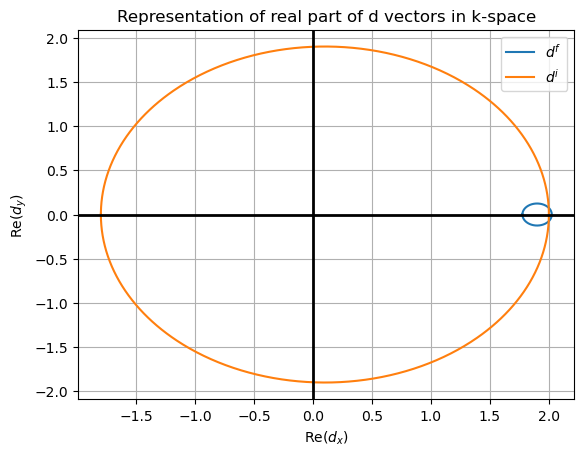

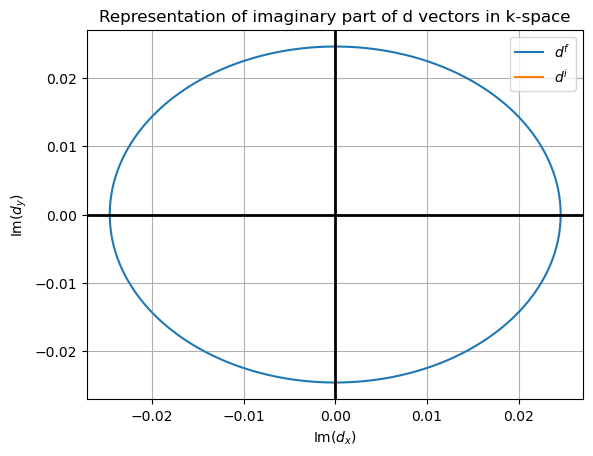

In [10]:
plt.plot(np.real(df[:,0]) , np.real(df[:,1]) , label = r"$d^f$")
plt.plot(np.real(di[:,0]) , np.real(di[:,1]) , label = r"$d^i$")
plt.xlabel(r'Re$(d_{x})$')
plt.ylabel(r'Re$(d_{y})$')
plt.axvline(linewidth = '2' , color = 'black')
plt.axhline(linewidth = '2' , color = 'black')
# plt.xlim(-6,6)
# plt.ylim(-6,6)
plt.grid()
plt.legend()
plt.title("Representation of real part of d vectors in k-space")

plt.figure()

plt.plot(np.imag(df[:,0]) , np.imag(df[:,1]) , label = r"$d^f$")
plt.plot(np.imag(di[:,0]) , np.imag(di[:,1]) , label = r"$d^i$")
plt.xlabel(r'Im$(d_{x})$')
plt.ylabel(r'Im$(d_{y})$')
plt.axvline(linewidth = '2' , color = 'black')
plt.axhline(linewidth = '2' , color = 'black')
# plt.xlim(-6,6)
# plt.ylim(-6,6)
plt.grid()
plt.legend()
plt.title("Representation of imaginary part of d vectors in k-space")

I'm defining $\hat d_i \cdot \hat d_f = \cos(\Delta_k)$  (based on the Hermitian case).

In [11]:
"""defining cos(delta_k)"""

cos_delta_k = np.array(len(k)*[0.00] , dtype = complex)

for i in range(len(k)):
    cos_delta_k[i] = np.dot(di_normed[i] , df_normed[i])

Now defining the eigenvalues = $\pm\kappa_{k}$, will drop the $k$ henceforth.

$\kappa^2 = d_x^2 + d_y^2 = v^2 + w^2 + vw (e^{-ik} + e^{ik + \gamma})$

$\nu = \kappa^{*}$

In [12]:
"""Defining the energies as a function of k (dispersion relation)"""

kappa_i = np.array(len(k)*[0.00] , dtype = complex)
kappa_f = np.array(len(k)*[0.00] , dtype = complex)

for i in range(len(k)):
    kappa_i[i] = np.sqrt(np.sum(   di[i]**2   ))
    kappa_f[i] = np.sqrt(np.sum(   df[i]**2   ))

nu_i = np.conjugate(kappa_i)
nu_f = np.conjugate(kappa_f)


In [13]:
# """Calculating the critical momentum and critical times"""

# Efkc_analytical = np.sqrt(v(quench=True)**2 + w(quench=True)**2 + 2*v(quench=True)*w(quench=True)*np.cos(2.957))

# tc_analytical = pi/(2*Efkc_analytical)  #tc assuming continuum limit

# index_of_kc = np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))[0]

# tc = pi/(2*Efk[index_of_kc])[0]  #tc calculated for our discrete array

Ritu's paper describes this $w(n,k)$ function. The Fischer Zeros occur at $k$ = $k_c$ where Re $[w(n,k_c) ] = 0$. I define this here. 

$w(n,k) = i\frac{(2n+1)\pi}{2\kappa^f} - \frac{1}{\kappa^f}\tanh^{-1}(\cos\Delta_k)$

In [14]:
"""Function to calculate the nth Fischer Zero"""

def kctc(n):
    w = I*(pi*(2*n+1))/(2*kappa_f) - (1/kappa_f)*np.arctanh(cos_delta_k)
    kc_index = np.where(np.abs(np.real(w)) == min(np.abs(np.real(w))))
    kc = k[kc_index]

    return kc

Now defining the Loschmidt Echo $G(t)$:

$$G(t) = \prod_k \left[ \cos(\kappa^f t) - i\cos(\Delta_k) \sin(\kappa^f t) \right]$$

And the Loschmidt Return Rate:

$$ I(t) = \frac{\log |G(t)|}{L} $$

where L is the length of the chain = length of the $k$ array. In the limit $L \rightarrow \infty $, we get:

$ I(t) = \frac{-1}{2\pi} \oint_k \log |G_k(t)| dk $.

In [15]:
"""Defining the Loschmidt amplitude and the Loschmidt return rate"""

Gk = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    for k_val in range(len(k)):
        Gk[i,k_val] = complex(np.cos(kappa_f[k_val]*t[i]) , -cos_delta_k[k_val]*np.sin(kappa_f[k_val]*t[i]))
        
# LE_amp = np.array(len(t)*[1.00] , dtype = complex)

# for i in tqdm(range(len(t))):
#     for k_val in range(len(k)):
#         LE_amp[i] = LE_amp[i]*Gk[i][k_val]
        
# rate = -(1/len(k))*np.log(np.abs(LE_amp))

limit_rate = -(1/(2*pi))*np.trapz(np.log(np.abs(Gk)) , k , axis=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

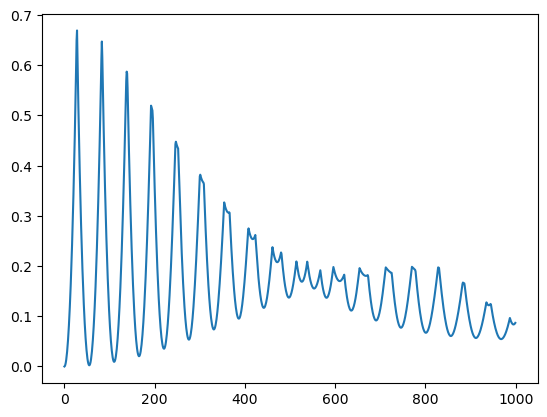

In [16]:
plt.plot(limit_rate)
# plt.xlim(0 , 300)
# plt.ylim(0,0.5)

In [17]:
L = np.prod(Gk[34,:])
print(L)

(-1.3453249302350745e-169+3.359513815908088e-169j)


In [18]:
# plt.plot(t , rate)
# plt.figure()
# plt.plot(t , limit_rate)
# plt.figure()
# plt.plot(LE_amp)
#plt.xlim(0,100)

In [19]:
# """Defining the Loschmidt amplitude and the Loschmidt return rate"""

# Gk = np.zeros((len(t) , len(k)) , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)):
#         Gk[i,k_val] = complex(np.cos(Efk[k_val]*t[i]) , -cos_delta_k[k_val]*np.sin(Efk[k_val]*t[i]))
        
# LE_amp = np.array(len(t)*[1.00] , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)):
#         LE_amp[i] = LE_amp[i]*Gk[i][k_val]
        
# rate = (-1/len(k))*np.real(np.log(np.abs(LE_amp)**2))

In [20]:
def dphi_d(t_index , k_index):
    
    z = v() + w()*np.exp(-I*k[k_index])
    z_star = v() + w()*np.exp(I*k[k_index])
    z_gamma = z_star
    z_star_gamma = z

    zf = v(quench=True) + w(quench=True)*np.exp(-I*k[k_index])
    zf_star = v(quench=True) + w(quench=True)*np.exp(I*k[k_index])
    zf_gamma = v(quench=True) + w(quench=True)*np.exp(gamma + I*k[k_index])
    zf_star_gamma = v(quench=True) + w(quench=True)*np.exp(gamma - I*k[k_index])

    mu = (z*kappa_f[k_index])/(zf*kappa_i[k_index])
    mu_star = (z_star*nu_f[k_index])/(zf_star*kappa_i[k_index])
    mu_gamma = (z_star*kappa_f[k_index])/(zf_gamma*kappa_i[k_index])
    mu_star_gamma = (z*nu_f)/(zf_star_gamma*kappa_i[k_index])

    alpha = (1+mu)/2
    beta = (1-mu)/2

    alpha_star = (1+mu_star)/2
    beta_star = (1-mu_star)/2

    alpha_gamma = (1+mu_gamma)/2
    beta_gamma = (1-mu_gamma)/2

    alpha_star_gamma = (1+mu_star_gamma)/2
    beta_star_gamma = (1-mu_star_gamma)/2

    rho = (1/2) + (zf_star*kappa_f[k_index])/(2*zf_gamma*nu_f[k_index])
    sigma = (1/2) - (zf_star*kappa_f[k_index])/(2*zf_gamma*nu_f[k_index])

    rho_star = (1/2) + (zf*nu_f[k_index])/(2*zf_star_gamma*kappa_f[k_index])
    sigma_star = (1/2) - (zf*nu_f[k_index])/(2*zf_star_gamma*kappa_f[k_index])

    Sbrasm = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*rho_star - alpha*np.exp(I*t[t_index]*kappa_f[k_index])*sigma_star
    Sbsarm = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*sigma_star - alpha*np.exp(I*t[t_index]*kappa_f[k_index])*rho_star

    Sbrasp = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*rho_star + alpha*np.exp(I*t[t_index]*kappa_f[k_index])*sigma_star
    Sbsarp = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*sigma_star + alpha*np.exp(I*t[t_index]*kappa_f[k_index])*rho_star

    x = (kappa_f[k_index]/2)*Sbrasm + (nu_f[k_index]/2)*Sbrasp
    y = (kappa_f[k_index]/2)*Sbsarm - (nu_f[k_index]/2)*Sbsarp

    numerator = - (  np.exp(I*t[t_index]*nu_f[k_index])*beta_star*x + np.exp(-I*t[t_index]*nu_f[k_index])*alpha_star*y  )
    denominator = beta_star*Sbrasp*np.exp(I*nu_f[k_index]*t[t_index]) + alpha_star*Sbsarp*np.exp(-I*nu_f[k_index]*t[t_index])

    dphi = numerator / denominator

    return dphi 
    



In [21]:
# def dphi_d(t_index , k_index):
#     z = v() + w()*np.exp(-I*k[k_index])
#     z_star = np.conjugate(z)

#     zf = v(quench=True) + w(quench=True)*np.exp(-I*k[k_index])
#     zf_star = np.conjugate(zf)

#     z_gamma = z_star
#     z_gamma_star = z

#     z_gamma_f = v(quench=True) + w(quench=True)*np.exp(gamma + I*k[k_index])
#     z_gamma_f_star = np.conjugate(z_gamma_f)

#     mu = (z*kappa_f[k_index])/(zf*kappa_i[k_index])
#     mu_gamma = (z_gamma*kappa_f[k_index])/(z_gamma_f*kappa_i[k_index])

#     rho = (zf_star*kappa_f[k_index])/(2*z_gamma_f*nu_f[k_index]) + 1/2
#     sigma = 1/2 - (zf_star*kappa_f[k_index])/(2*z_gamma_f*nu_f[k_index])

#     rho_star = np.conjugate(rho)
#     sigma_star = np.conjugate(sigma)

#     ka = 1/2 - (z_gamma*nu_f[k_index])/(2*zf_star*kappa_i[k_index])
#     kha = 1/2 + (z_gamma*nu_f[k_index])/(2*zf_star*kappa_i[k_index])

#     alpha = (1+mu)/2
#     beta = (1-mu)/2

#     alpha_gamma = (1+mu_gamma)/2
#     beta_gamma = (1-mu_gamma)/2

#     numerator_P = (1/2)*(-I*kappa_f[k_index])  *  (    np.exp(-I*t[t_index]*kappa_f[k_index])*beta * (np.exp(I*t[t_index]*nu_f[k_index])*ka*rho + np.exp(-I*t[t_index]*nu_f[k_index])*kha*sigma) - np.exp(I*t[t_index]*kappa_f[k_index])*alpha * (np.exp(I*t[t_index]*nu_f[k_index])*ka*sigma + np.exp(-I*t[t_index]*nu_f[k_index])*kha*rho )    ) 
#     numerator_T2 = (1/2)*(I*nu_f[k_index])*(   np.exp(I*t[t_index]*nu_f[k_index]*ka) *  (np.exp(-I*t[t_index]*kappa_f[k_index])*beta*rho_star + np.exp(I*t[t_index]*kappa_f[k_index])*alpha*sigma_star) - np.exp(-I*t[t_index]*nu_f[k_index]*kha) *  (np.exp(-I*t[t_index]*kappa_f[k_index])*beta*sigma_star + np.exp(I*t[t_index]*kappa_f[k_index])*alpha*rho_star )   )
    
#     denominator = (    np.exp(-I*t[t_index]*kappa_f[k_index])*beta * (np.exp(I*t[t_index]*nu_f[k_index])*ka*rho + np.exp(-I*t[t_index]*nu_f[k_index])*kha*sigma) + np.exp(I*t[t_index]*kappa_f[k_index])*alpha * (np.exp(I*t[t_index]*nu_f[k_index])*ka*sigma + np.exp(-I*t[t_index]*nu_f[k_index])*kha*rho )    )    

#     dphi = (numerator_P - numerator_T2)/denominator

#     return dphi 
    



In [22]:
dphi_array = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    for k_val in range(len(k)):
        dphi_array[i,k_val] = dphi_d(i , k_val)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
"""Defining the dynamical phase from dphi (by performing the time integral) here"""
phi_dyn = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    phi_dyn[i] = np.trapz(dphi_array[:i] , t[:i] , axis = 0)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
# """Defining the dynamical phase from dphi (by performing the time integral) here"""
# phi_array = np.zeros((len(t) , len(k)) , dtype = complex)

# for i in tqdm(range(len(t))):
#     phi_array[i] = np.trapz(dphi_array[:i] , t[:i] , axis = 0)

# phi_dyn = -I*phi_array

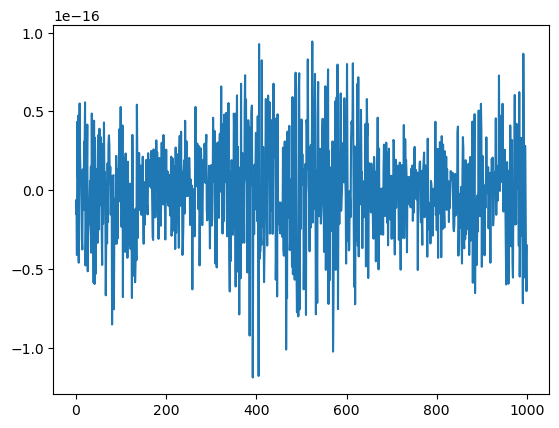

In [25]:
#plt.plot(np.real(phi_dyn[100]))
plt.plot(np.imag(phi_dyn[100]))

In [28]:
np.imag(-I*np.log(   Gk / np.abs(Gk)  ))

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.66460334e-17,  1.50487262e-16, -1.08420217e-18, ...,
        -1.04300249e-16,  1.62630326e-16,  3.66460334e-17],
       [-7.28583860e-17,  5.63785130e-17, -3.72965547e-17, ...,
        -1.70002901e-16, -9.62771529e-17, -7.28583860e-17],
       ...,
       [ 4.16333634e-17,  1.66533454e-16, -3.46944695e-17, ...,
         1.17961196e-16,  1.17961196e-16,  2.77555756e-17],
       [-1.63064007e-16, -4.51028104e-17,  8.32667268e-17, ...,
         1.73472348e-17, -0.00000000e+00,  6.59194921e-17],
       [-6.24500451e-17,  1.12757026e-16,  2.25514052e-17, ...,
        -1.56125113e-17,  3.12250226e-17, -6.24500451e-17]])

In [29]:
"""Defining the Pancharatnam Geometric Phase (PGP) and dnu, where nu = DTOP"""

PGP = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):  # i know i don't need to loop this, PGP = angle(Gk) - phi_dyn will suffice, will change later
    for k_val in range(len(k)):
        if (np.imag(phi_dyn[i,k_val]) + np.imag(-I*np.log(Gk[i,k_val] / np.abs(Gk[i,k_val]))))>1e-10:
            break
        PGP[i,k_val] = make_periodic(   make_periodic(np.real(-I*np.log(   Gk[i,k_val] / np.abs(Gk[i,k_val])  ) ))   - make_periodic(  np.real(phi_dyn[i,k_val])  )   )




    
# d_dk = FinDiff(0,dk)

# for i in range(len(t)):
#     dnu[i] = d_dk(PGP[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [30]:
PGP_in_EBZ = PGP[: , np.where(k==0)[0][0]:]

In [31]:
PGP_in_EBZ

array([[ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-0.06079852+0.j, -0.06079776+0.j, -0.06079497+0.j, ...,
         0.05331   +0.j,  0.05331404+0.j,  0.05331557+0.j],
       [-0.18239549+0.j, -0.1823932 +0.j, -0.18238486+0.j, ...,
         0.15992999+0.j,  0.15994205+0.j,  0.15994663+0.j],
       ...,
       [-1.77766419+0.j, -1.7765326 +0.j, -1.7731735 +0.j, ...,
        -0.57600993+0.j, -0.57266423+0.j, -0.57156739+0.j],
       [-1.89924446+0.j, -1.8981118 +0.j, -1.89474983+0.j, ...,
        -0.46939092+0.j, -0.46603794+0.j, -0.46493838+0.j],
       [-2.02082319+0.j, -2.0196895 +0.j, -2.01632491+0.j, ...,
        -0.36277149+0.j, -0.359411  +0.j, -0.35830861+0.j]])

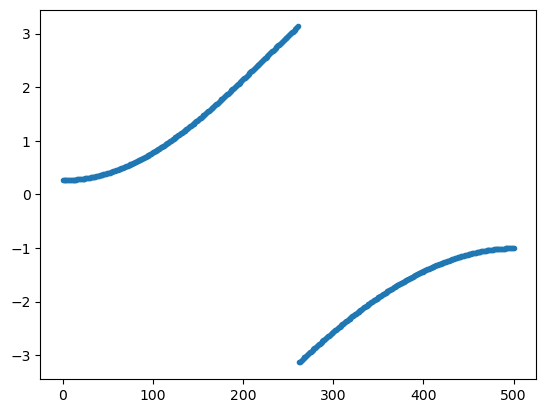

In [34]:
plt.plot(PGP_in_EBZ[50].real , ".")

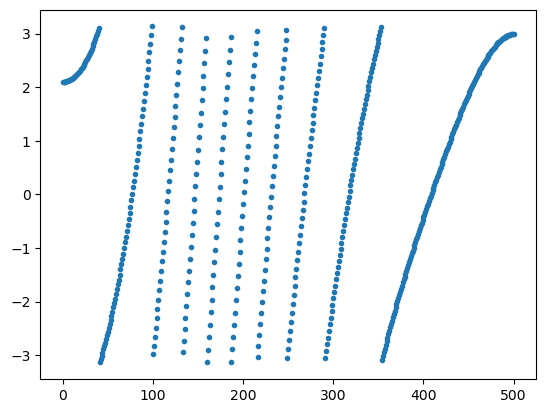

In [38]:
plt.plot(PGP_in_EBZ[500].real , ".")

In [41]:
# """In the DTOP paper, the LE is defined as a product of Gk terms for k>0, which is inexplicable to me. Here I try it such 
# that each Gk, k>0 is a product of the k>0 and k<0 terms, and seeing if defining the PGP that way changes anything. 
# The full LE and hence the rate function are unchanged because I'm just regrouping the terms (so that k>0 and k<0 are bunched
# together)"""

# Gk_paper = np.zeros((len(t) , len(k)//2) , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         Gk_paper[i,k_val] = complex(np.cos(Efk[k_val]*t[i]) , -cos_delta_k[k_val]*np.sin(Efk[k_val]*t[i])) * complex(np.cos(Efk[-k_val]*t[i]) , -cos_delta_k[-k_val]*np.sin(Efk[-k_val]*t[i]))
        
# LE_amp_paper = np.array(len(t)*[1.00] , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         LE_amp_paper[i] = LE_amp_paper[i]*Gk_paper[i][k_val]
        
# rate_paper = (-1/len(k))*np.real(np.log(np.abs(LE_amp_paper)**2))


# PGP_paper = np.zeros((len(t) , len(k)//2))
# dnu_paper = np.zeros((len(t) , len(k)//2))

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         PGP_paper[i,k_val] = np.angle(Gk_paper[i,k_val]) - (Efk[k_val]*t[i]*cos_delta_k[k_val]%(2*pi)) #by theory this should be -Efk ? Check again later
    

# # for i in range(len(t)):
# #     dnu[i] = np.gradient(PGP[i] , k)


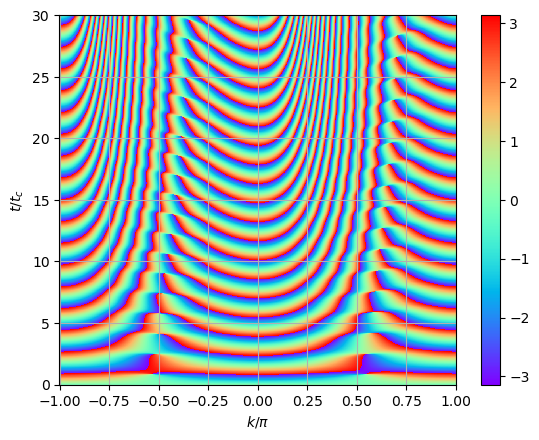

In [39]:
#%matplotlib qt
plt.pcolormesh(k/pi , t , np.real(PGP) , cmap = 'rainbow')
plt.colorbar()
#plt.grid()
plt.xlabel(r'$k/\pi$')
plt.ylabel(r'$t/t_c$')
# plt.clim(-8 , 0)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.yscale('log')
# #plt.xlim(10,95)
# plt.ylim(10,4000)
# plt.xlim(0,1)
# plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
plt.show()


In [40]:
pieces = len(PGP)*[0.00]
jump_sizes = len(PGP)*[0.00]

for i in range(len(PGP)):
    #print("index = ",i)
    pieces[i] , jump_sizes[i] = disc_pieces( k , PGP_in_EBZ[i] )

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18088\550934394.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  dy[i] = (y[i+1] - y[i])


In [56]:
dnu = len(PGP)*[0.00]

for i in range(len(dnu)):
    if not np.shape(jump_sizes[i]): #if there is no jump...
        dnu[i] = forward_difference(pieces[i] , dk)
        
    else:  #if there is a nonzero number of jumps
        dnu[i] = [forward_difference(arr , dk) for arr in pieces[i]]
        
        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5236\2578896478.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[i] = (y[i+1] - y[i])/(dx)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5236\2578896478.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[-1] = (y[-1] - y[-2])/(dx)


In [57]:
nu = len(PGP)*[0.00]

for i in range(len(nu)):
    if not np.shape(jump_sizes[i]): #if there is no jump...
        nu[i] = (1/(2*pi))*np.trapz(pieces[i] , dx = dk)
        
    else:  #if there is a nonzero number of jumps
        nu[i] = (1/(2*pi))*(np.sum([np.trapz(arr , dx = dk) for arr in pieces[i]]) + np.sum(jump_sizes[i]))

In [58]:
np.sum([np.trapz(arr , dx = dk) for arr in pieces[300]])

(0.3150326953182251+0j)

Text(0.5, 0, 'time')

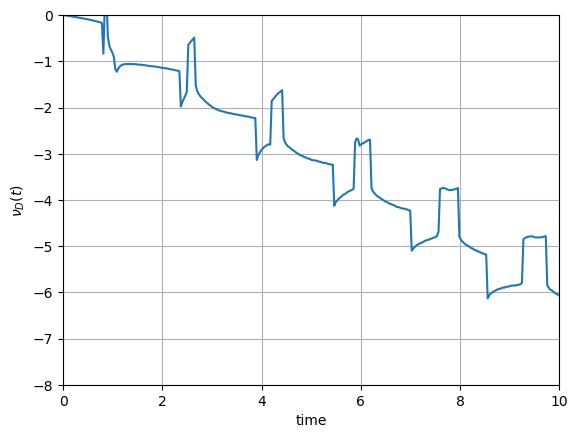

In [59]:
plt.plot(t , nu)
#plt.xticks([1,3,5,7])
plt.xlim(0,10)
plt.ylim(-8,0)
plt.grid()
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel("time")

In [35]:
# """Now defining nu =  integral from k = 0 to pi of dnu"""

# dnu = np.zeros((len(t) , len(k)))

# # d_dk = FinDiff(0,dk)

# # for i in range(len(t)):
# #     dnu[i] = d_dk(PGP[i])

# for i in range(len(t)):
#     dnu[i] = forward_difference(PGP[i] , dk)
    
# dnu_in_EBZ = dnu[: , np.where(k==0)[0][0]:]

# # for i in range(len(t)):
# #     dnu[i] = np.gradient(PGP[i] , k)

# nu = np.array(len(t)*[0.00])

# for i in range(len(t)):
#     nu[i] = (1/2*pi)*np.trapz(dnu_in_EBZ[i] , dx = dk)
    

In [36]:
# """Now defining nu =  integral from k = 0 to pi of dnu"""

# for i in range(len(t)):
#     dnu[i] = np.gradient(PGP[i] , k)

# nu = np.array(len(t)*[0.00])

# for i in range(len(t)):
#     nu[i] = (1/2*pi)*np.trapz(dnu_in_EBZ[i] , dx = dk)
    

In [37]:
# dk = k[1]-k[0]

In [38]:
# np.where(t>tc)

Text(0.5, 0, '$t/t_c$')

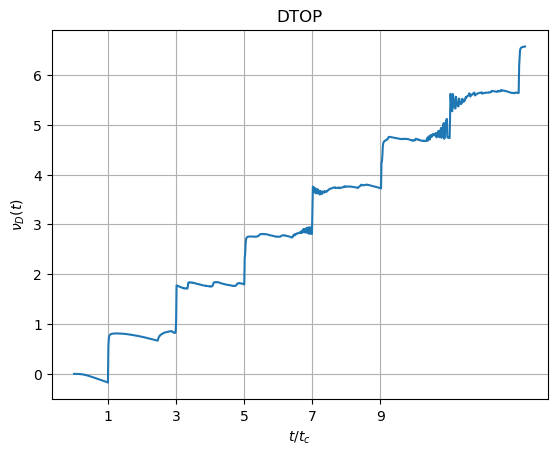

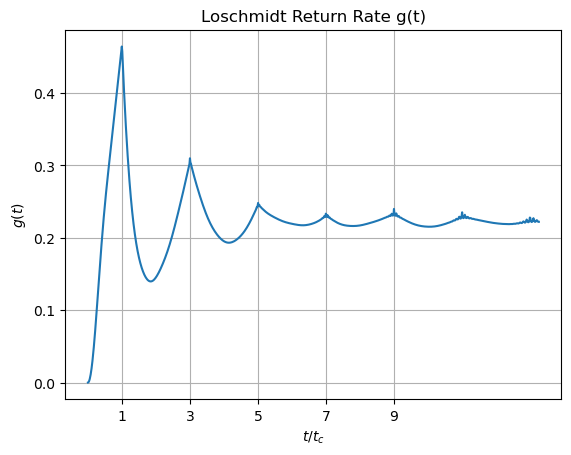

In [39]:
plt.plot(t/tc , nu)
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel(r'$t/t_c$')
plt.xticks([1 , 3 , 5 , 7 , 9])
plt.grid()
# plt.xlim(0,1)
# plt.ylim(0,40)
#plt.axvline(tc)
plt.title("DTOP")
#plt.axvline(tc , color='red')
#plt.ylim(-2,2)
#plt.savefig("DTOP_plot.png")

plt.figure()
plt.plot(t/tc,rate)
plt.grid()
#plt.axvline(tc , color='red')
# plt.axvline(3*tc , color='red')
# plt.axvline(5*tc , color='red')
# plt.axvline(7*tc , color='red')
plt.xticks([1 , 3 , 5 , 7 , 9])
#plt.xticks([tc , 3*tc , 5*tc , 7*tc] , [r'$t_c$' , r'$3t_c$' , r'$5t_c$' , r'$7t_c$'])
plt.title("Loschmidt Return Rate g(t)")
plt.ylabel(r'$g(t)$')
plt.xlabel(r'$t/t_c$')


#plt.ylim(0,2)
#plt.xlim(0,1)

In [40]:
"""Rough work begins here"""

'Rough work begins here'

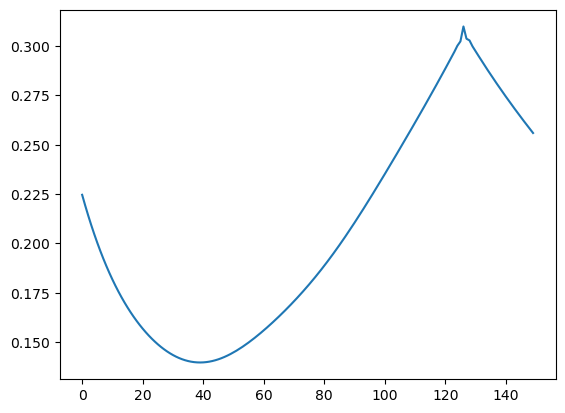

In [41]:
plt.plot(rate[100:250])

In [42]:
print(rate[100:200])

[0.22464272 0.21927468 0.21417256 0.20932662 0.20472695 0.20036356
 0.19622642 0.19230549 0.18859084 0.18507264 0.18174128 0.17858743
 0.1756021  0.17277667 0.170103   0.16757344 0.16518088 0.16291882
 0.16078132 0.15876308 0.1568594  0.15506622 0.15338005 0.15179797
 0.15031761 0.14893707 0.14765491 0.14647006 0.14538179 0.14438963
 0.14349331 0.14269269 0.14198772 0.14137836 0.14086451 0.14044598
 0.14012244 0.13989337 0.13975802 0.1397154  0.13976423 0.13990296
 0.14012975 0.14044247 0.14083871 0.14131583 0.14187091 0.14250085
 0.1432024  0.14397216 0.14480663 0.1457023  0.14665566 0.14766322
 0.14872163 0.14982766 0.15097826 0.1521706  0.15340211 0.15467049
 0.15597373 0.15731014 0.15867836 0.16007732 0.16150628 0.16296483
 0.1644528  0.1659703  0.1675177  0.16909553 0.17070451 0.1723455
 0.17401943 0.17572728 0.17747007 0.17924875 0.18106425 0.18291737
 0.18480879 0.18673904 0.18870844 0.19071716 0.19276511 0.19485201
 0.19697735 0.19914039 0.20134018 0.20357557 0.20584523 0.20814

Text(0, 0.5, '$\\cos(\\Delta_k)$')

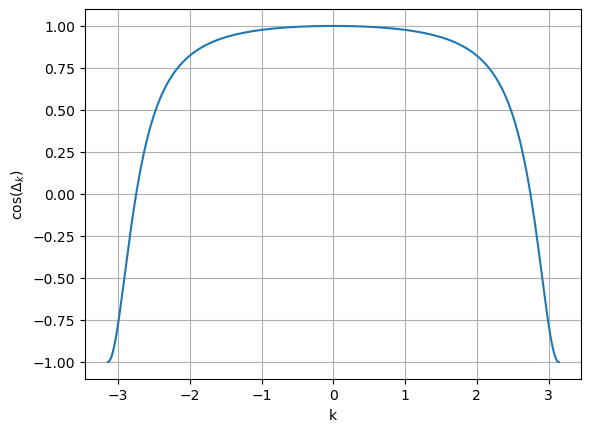

In [43]:
plt.plot(k , cos_delta_k)
plt.grid()
plt.xlabel("k")
plt.ylabel(r'$\cos(\Delta_k)$')

Text(0.5, 0, 'k')

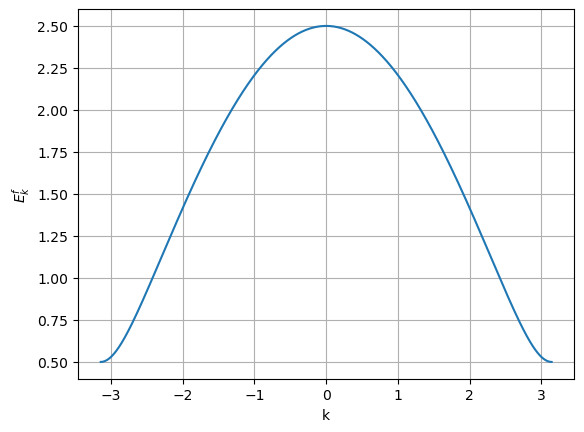

In [44]:
plt.plot(k , Efk)
plt.grid()
plt.ylabel(r'$E^f_k$')
plt.xlabel('k')

In [45]:
np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))

(array([937], dtype=int64),)

In [46]:
pi/(2*Efk[25])

2.932433217650412

In [200]:
np.sqrt(1.95928417e-01**2 +  2.69672331e-01**2)

0.33333333270931587

In [201]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [202]:
cos_delta_k

array([-1.        , -0.99516543, -0.98089725, -0.95786851, -0.92709857,
       -0.88982742, -0.84738424, -0.80107342, -0.75209183, -0.70147989,
       -0.65010222, -0.59864974, -0.54765521, -0.49751519, -0.44851381,
       -0.40084542, -0.3546345 , -0.30995241, -0.266831  , -0.22527326,
       -0.18526164, -0.14676434, -0.10974002, -0.07414129, -0.03991723,
       -0.00701528,  0.02461752,  0.05503359,  0.08428423,  0.11241919,
        0.13948646,  0.16553212,  0.19060026,  0.21473301,  0.23797058,
        0.26035127,  0.28191156,  0.30268623,  0.32270837,  0.34200951,
        0.3606197 ,  0.37856757,  0.39588041,  0.41258425,  0.42870393,
        0.44426315,  0.45928453,  0.47378969,  0.48779926,  0.50133299,
        0.51440972,  0.52704748,  0.53926352,  0.55107434,  0.5624957 ,
        0.57354272,  0.58422986,  0.59457094,  0.60457922,  0.61426738,
        0.62364758,  0.63273146,  0.64153016,  0.65005438,  0.65831434,
        0.66631986,  0.67408035,  0.68160482,  0.68890192,  0.69

In [203]:
di_normed[30] , df_normed[30]

(array([0.90237501, 0.43095167]), array([-0.30086958,  0.9536653 ]))

In [204]:
di[30]/np.sqrt(np.sum(di[30]**2)) , df[30]/np.sqrt(np.sum(df[30]**2))

(array([0.90237501, 0.43095167]), array([-0.30086958,  0.9536653 ]))

In [205]:
np.where(abs(cos_delta_k) < 0.01)

(array([ 25, 974], dtype=int64),)

In [206]:
cos_delta_k[25]

-0.007015277050193391

In [207]:
cos_delta_k

array([-1.        , -0.99516543, -0.98089725, -0.95786851, -0.92709857,
       -0.88982742, -0.84738424, -0.80107342, -0.75209183, -0.70147989,
       -0.65010222, -0.59864974, -0.54765521, -0.49751519, -0.44851381,
       -0.40084542, -0.3546345 , -0.30995241, -0.266831  , -0.22527326,
       -0.18526164, -0.14676434, -0.10974002, -0.07414129, -0.03991723,
       -0.00701528,  0.02461752,  0.05503359,  0.08428423,  0.11241919,
        0.13948646,  0.16553212,  0.19060026,  0.21473301,  0.23797058,
        0.26035127,  0.28191156,  0.30268623,  0.32270837,  0.34200951,
        0.3606197 ,  0.37856757,  0.39588041,  0.41258425,  0.42870393,
        0.44426315,  0.45928453,  0.47378969,  0.48779926,  0.50133299,
        0.51440972,  0.52704748,  0.53926352,  0.55107434,  0.5624957 ,
        0.57354272,  0.58422986,  0.59457094,  0.60457922,  0.61426738,
        0.62364758,  0.63273146,  0.64153016,  0.65005438,  0.65831434,
        0.66631986,  0.67408035,  0.68160482,  0.68890192,  0.69

In [208]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [209]:
min(abs(cos_delta_k))

0.007015277050193391

In [210]:
np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))

(array([25], dtype=int64),)

In [211]:
cos_delta_k[80]

0.7614368924068418

In [212]:
cos_delta_k[27]

0.05503359242062322

In [213]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [214]:
di[10]/(np.sqrt(di[10,0]**2 + di[10,1]**2)) , df[10]/(np.sqrt(df[10,0]**2 + df[10,1]**2))

(array([0.98638384, 0.16445946]), array([-0.76621431,  0.64258511]))

In [215]:
np.array([complex(1,2) , 0])

array([1.+2.j, 0.+0.j])

In [216]:
pi/(2*Efk[20])

0.8438394563456443

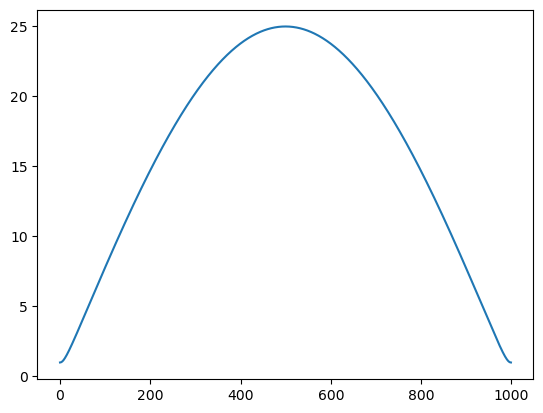

In [218]:
plt.plot(Efk)

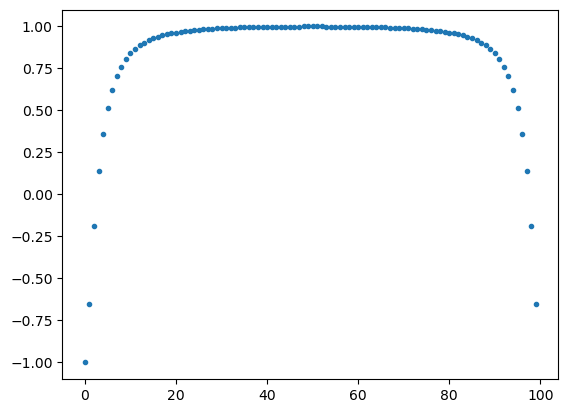

In [174]:
vp = v(quench=True)
vn = v()
wp = w(quench=True)
wn = w()

dd = vn*vp + wn*wp + (wn*vp + vn*wp)*np.cos(k)
denom = Eik*Efk

plt.plot(dd/denom , '.')

In [170]:
(wn*vp + vn*wp)

TypeError: can only concatenate tuple (not "int") to tuple

In [173]:
min(abs(cos_delta_k))

0.1386895361573503

In [65]:
tt = np.linspace(-4*pi , 4*pi , 1000)
w = np.linspace(-pi,pi,1000)

In [78]:
comp = [complex(np.cos(t_t) , np.sin(t_t)) for t_t in tt]

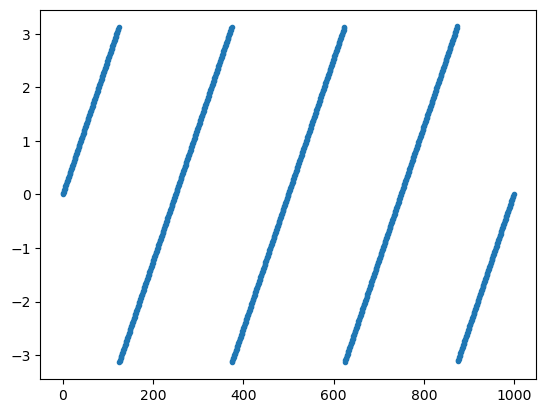

In [79]:
plt.plot(np.angle(comp) , ".")

In [ ]:
def get_PGP(t , k):
    
    Eik = np.sqrt(v()**2 + w()**2*np.exp(gamma) + v()*w()*(np.exp(-I*k) + np.exp(gamma + I*k)))
    Efk = np.sqrt(v(quench=True)**2 + w(quench=True)**2*np.exp(gamma) + v(quench=True)*w(quench=True)*(np.exp(-I*k) + np.exp(gamma + I*k)))

    
    
    di_normed = (1/Eik)*np.array([v() + w()*np.exp(gamma/2)*np.cos(k - I*gamma/2) , w()*np.exp(gamma/2)*np.sin(k - I*gamma/2)])
    df_normed = (1/Eik)*np.array([v(quench=True) + w(quench=True)*np.exp(gamma/2)*np.cos(k - I*gamma/2) , w(quench=True)*np.exp(gamma/2)*np.sin(k - I*gamma/2)])
        
    cos_delta_k = np.dot(di_normed , df_normed)
    
    Gk = np.cos(Efk*t) - I*cos_delta_k*np.sin(Efk*t)
    
    phi_k = np.angle(Gk)
    
    phi_dyn = np.angle(complex(np.cos(-Efk*t*cos_delta_k) , np.sin(-Efk*t*cos_delta_k)))
    
    PGP = make_periodic(phi_k - phi_dyn)  #also try doing np.angle instead of make_periodic
    
    return PGP
    